In [ ]:
news_Art='BBC News.xlsx'
import pandas as news_ArtP

news_Art_F = news_ArtP.read_excel(news_Art) # read excel sheet of' bbc news article'.
news_Art_F

,BBC News URL,News _Cat
0,https://www.bbc.com/culture/article/20230309-w...,Culture
1,https://www.bbc.com/culture/article/20230317-s...,Culture
2,https://www.bbc.com/culture/article/20230316-t...,Culture
3,https://www.bbc.com/culture/article/20230315-h...,Culture
4,https://www.bbc.com/culture/article/20230309-t...,Culture
...,...,...
194,https://www.bbc.com/travel/article/20200930-ns...,Travel
195,https://www.bbc.com/travel/article/20190210-wh...,Travel
196,https://www.bbc.com/travel/article/20190121-a-...,Travel
197,https://www.bbc.com/travel/article/20181029-in...,Travel


In [ ]:
news_Art_F['News _Cat'].unique()

array(['Culture', 'Sport', 'Travel'], dtype=object)

In [ ]:
news_Art_F['News _Cat'].value_counts()

Sport      83
Travel     81
Culture    35
Name: News _Cat, dtype: int64

** Sport and travel news categories having higher amount of news.

In [ ]:
news_Art_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BBC News URL  199 non-null    object
 1   News _Cat     199 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [ ]:
!pip install beautifulsoup4
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
news_Art_F['BBC News URL']

0      https://www.bbc.com/culture/article/20230309-w...
1      https://www.bbc.com/culture/article/20230317-s...
2      https://www.bbc.com/culture/article/20230316-t...
3      https://www.bbc.com/culture/article/20230315-h...
4      https://www.bbc.com/culture/article/20230309-t...
                             ...                        
194    https://www.bbc.com/travel/article/20200930-ns...
195    https://www.bbc.com/travel/article/20190210-wh...
196    https://www.bbc.com/travel/article/20190121-a-...
197    https://www.bbc.com/travel/article/20181029-in...
198    https://www.bbc.com/travel/article/20180328-ch...
Name: BBC News URL, Length: 199, dtype: object

## News Extraction using beautifulSoup

In [ ]:
import requests as news_ArtRq
from bs4 import BeautifulSoup as news_ArtBS

In [ ]:
news_ArtRq_Vr=news_ArtRq.get(news_Art_F['BBC News URL'][0]) ## request to get news from url link
news_ArtRq_BS=news_ArtBS(news_ArtRq_Vr.text, 'html.parser')
# using the request variable and beautiful soup variable finding all the text parser
for p in news_ArtRq_BS.find_all('p'):
  news_Art_News=p.text
  print(news_Art_News)


Home
Film
Art
Books
Music
TV
Style
Identities
Designed
The Collection
More
Across decades of pop music, numerous performers have been lauded for their chameleon-like quality – a preternatural ability to switch up their image and sound without sacrificing their artistic identity. David Bowie and Madonna are the two most famous who spring to mind. But Miley Cyrus has baked shapeshifting into her personal brand in a particularly 21st-Century fashion. The consummate modern pop star, she has taken advantage of blurred genre boundaries at a time when eclectic Spotify playlists hold more sway with listeners than traditional (and generally more genre-prescriptive) radio playlists.
More like this: – How Shania Twain became a Gen Z icon – Is it time to reconsider Britney's legacy?  – Pop's most underestimated icon
Since Cyrus launched her recording career 17 years ago, when she played a fictional pop star in the hit Disney series Hannah Montana, she has released everything from peppy pop-rock t

In [ ]:
## Avoiding 'Home Film Art Books Music TV Style Identities Designed The Collection More'

news_ArtRq_BS.find_all('p')[12:] 

[<p>Across decades of pop music, numerous performers have been lauded for their chameleon-like quality – a preternatural ability to switch up their image and sound without sacrificing their artistic identity. <a href="https://www.bbc.com/culture/article/20210106-the-photos-that-made-david-bowie-an-icon">David Bowie</a> and Madonna are the two most famous who spring to mind. But Miley Cyrus has baked shapeshifting into her personal brand in a particularly 21st-Century fashion. The consummate modern pop star, she has taken advantage of blurred genre boundaries at a time when eclectic Spotify playlists hold more sway with listeners than traditional (and generally more genre-prescriptive) radio playlists.</p>,
 <p><strong>More like this:</strong><br/> – <a href="https://www.bbc.com/culture/article/20230201-how-country-pop-superstar-shania-twain-became-a-gen-z-icon">How Shania Twain became a Gen Z icon</a><br/> – <a href="https://www.bbc.com/culture/article/20221129-britney-spears-is-it-tim

## function to get all the news from the corresponding URLs.

In [ ]:
def Scrap_newss(nws):
  news_ArtRq_Vr=news_ArtRq.get(nws) ## request to get news from url link
  news_ArtRq_BS=news_ArtBS(news_ArtRq_Vr.text, 'html.parser')
  News_Ar=[]
  for p in news_ArtRq_BS.find_all('p')[12:]:
    news_Art_News=p.text
    News_Ar.append(news_Art_News)
  return News_Ar

In [ ]:
## calling the function 'Scrap_newss' by passing the URLs
F=[]
for n in news_Art_F['BBC News URL']:
  sn=Scrap_newss(n)
  sn=' '.join(sn)
  F.append(sn)

In [ ]:
F[0] #Single news in 0'th entry

'Across decades of pop music, numerous performers have been lauded for their chameleon-like quality – a preternatural ability to switch up their image and sound without sacrificing their artistic identity. David Bowie and Madonna are the two most famous who spring to mind. But Miley Cyrus has baked shapeshifting into her personal brand in a particularly 21st-Century fashion. The consummate modern pop star, she has taken advantage of blurred genre boundaries at a time when eclectic Spotify playlists hold more sway with listeners than traditional (and generally more genre-prescriptive) radio playlists. More like this: – How Shania Twain became a Gen Z icon – Is it time to reconsider Britney\'s legacy?  – Pop\'s most underestimated icon Since Cyrus launched her recording career 17 years ago, when she played a fictional pop star in the hit Disney series Hannah Montana, she has released everything from peppy pop-rock to risqué R&B, and reflective folk-pop to spangly country-disco. Now, the 

## Making new dataframe with news content and news category as attributes

In [ ]:
news_Art = news_ArtP.DataFrame()

In [ ]:
news_Art['News']=F

In [ ]:
news_Art['news_cat']=news_Art_F['News _Cat']
news_Art

,News,news_cat
0,"Across decades of pop music, numerous performe...",Culture
1,With exhibitions such as Africa Fashion at the...,Culture
2,"The US writer Mark Twain famously wrote: ""Ther...",Culture
3,"Some things never change. When Shrinking, Ted ...",Culture
4,One of the many reasons why the original The L...,Culture
...,...,...
194,"Meaning “women’s script” in Chinese, Nüshu ros...",Travel
195,"One task, though, seemed impossible: rememberi...",Travel
196,Roughly 150km south of Shanghai facing the Eas...,Travel
197,"Finally, the source of the mysterious noise ap...",Travel


## Pie chart

<Axes: title={'center': 'news category'}, ylabel='None'>

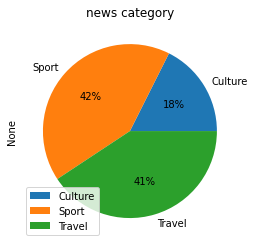

In [ ]:
news_Art.groupby('news_cat').size().plot(kind='pie', legend=True,title='news category', autopct='%1.0f%%')

In [ ]:
news_Art.to_csv('Summarized_news_Art.csv', index=False)